In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [22]:
data=pd.read_csv("Advertising.csv")

In [23]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [24]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [25]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [26]:
data=data.drop(["Unnamed: 0"], axis=1	)

In [27]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


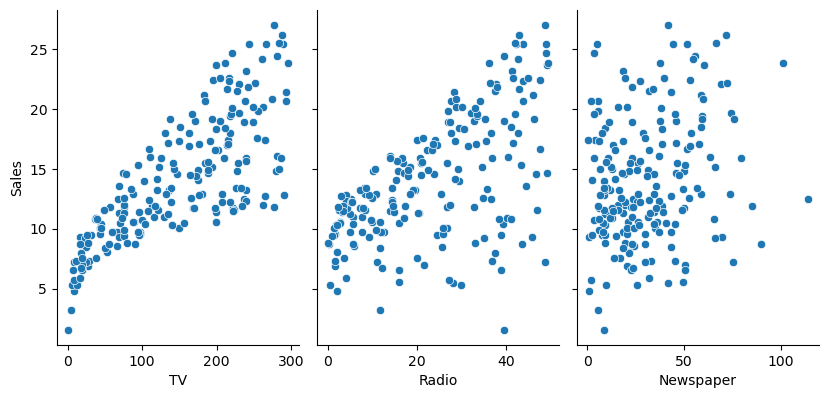

In [28]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.7)
plt.show()

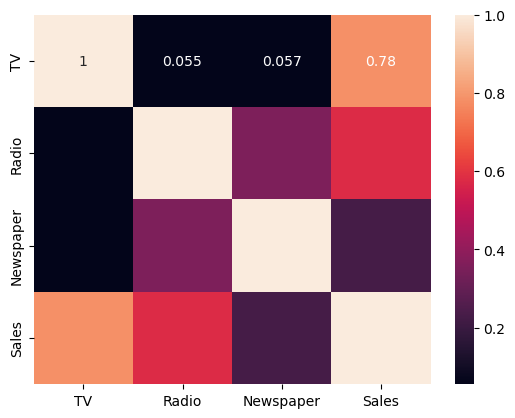

In [29]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [30]:
# Define features and target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [31]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [21]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 3.1740973539761046
R2 Score: 0.899438024100912


In [22]:
# You can now use the trained model to predict sales for new data
new_data = pd.DataFrame({'TV': [200], 'Radio': [50], 'Newspaper': [10]})
predicted_sales = model.predict(new_data)
print('Predicted Sales:', predicted_sales)

Predicted Sales: [21.41233469]


In [33]:
# Initialize the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)

# Train the model
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_reg.predict(X_test)


In [34]:
# Calculate the performance metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Output the performance metrics
print('Ridge Regression MSE:', mse_ridge)
print('Ridge Regression R-squared:', r2_ridge)

Ridge Regression MSE: 3.174094812092733
Ridge Regression R-squared: 0.89943810463304


In [35]:
# Initialize the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)

# Train the model
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_reg.predict(X_test)


In [36]:
# Calculate the performance metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Output the performance metrics
print('Lasso Regression MSE:', mse_lasso)
print('Lasso Regression R-squared:', r2_lasso)


Lasso Regression MSE: 3.1705218127881327
Lasso Regression R-squared: 0.8995513046486308
